In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('df_final.csv')
df = df.drop(columns = ['Unnamed: 0', 'Volume (metric tons)', 'Area Harvested (ha)', 'number_of_days_with_ltng','number_of_days_with_tstm','cloud_amount_okta','mslp','vapor_pressure_mbs','rainfall_number_of_rd','Other Disasters'])
df

,Province,Year,Quarter,yield (kg/ha),Region,Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps
0,Abra,1987.0,Quarter 1,1354.166667,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
1,Abra,1988.0,Quarter 1,1681.707317,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
2,Abra,1989.0,Quarter 1,1830.303030,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
3,Abra,1990.0,Quarter 1,1677.450980,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
4,Abra,1991.0,Quarter 1,1558.208955,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Tawi-tawi,2015.0,Quarter 4,1990.000000,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0
10187,Tawi-tawi,2016.0,Quarter 4,2166.666667,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0
10188,Tawi-tawi,2017.0,Quarter 4,2108.108108,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0
10189,Tawi-tawi,2018.0,Quarter 4,2058.823529,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0


In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [4]:
df = remove_outlier(df, 'yield (kg/ha)')
df

,Province,Year,Quarter,yield (kg/ha),Region,Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps
0,Abra,1987.0,Quarter 1,1354.166667,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
1,Abra,1988.0,Quarter 1,1681.707317,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
2,Abra,1989.0,Quarter 1,1830.303030,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
3,Abra,1990.0,Quarter 1,1677.450980,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
4,Abra,1991.0,Quarter 1,1558.208955,CORDILLERA ADMINISTRATIVE REGION,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Tawi-tawi,2015.0,Quarter 4,1990.000000,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0
10187,Tawi-tawi,2016.0,Quarter 4,2166.666667,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0
10188,Tawi-tawi,2017.0,Quarter 4,2108.108108,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0
10189,Tawi-tawi,2018.0,Quarter 4,2058.823529,AUTONOMOUS REGION IN MUSLIM MINDANAO,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0


In [5]:
df1 = df.copy()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10149 entries, 0 to 10190
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Province                            10149 non-null  object 
 1   Year                                10149 non-null  float64
 2   Quarter                             10149 non-null  object 
 3   yield (kg/ha)                       10149 non-null  float64
 4   Region                              10149 non-null  object 
 5   Fertilizer Applied (bags)           10149 non-null  float64
 6   Plow                                10149 non-null  float64
 7   Harrow                              10149 non-null  float64
 8   Sprayers                            10149 non-null  float64
 9   Tractors                            10149 non-null  float64
 10  Rice Mills                          10149 non-null  int64  
 11  Agricultural Processing Facilities  10149

In [7]:
df1.describe()

,Year,yield (kg/ha),Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps
count,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000
mean,2003.349591,3172.322017,1.072500,34257.783723,22690.332742,22019.422505,13665.702335,206.598187,161.478766,20975.924328,98.062174,75.230762,315.266036,189.640556,91.951818,1.670411,0.434821,74.300818,146.307814,99.450192,204.356501,30.868065,22.736388,26.804299,26.530973,24.129134,23.243275,82.009405,2.151548
std,9.458921,890.717428,0.269755,16022.021890,12026.547057,14294.947912,13305.715966,177.964962,151.937413,15139.490133,74.670864,61.832984,278.284805,164.409534,140.430650,9.970910,1.176239,60.886224,113.652004,108.799301,139.948058,2.315379,2.523988,2.316095,2.488711,2.193508,2.207763,3.891952,0.671707
min,1987.000000,705.000000,0.420000,11085.000000,6854.000000,3739.000000,326.000000,4.000000,3.000000,3572.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.266667,23.133333,13.600000,18.900000,17.900000,16.166667,15.133333,68.000000,1.000000
25%,1995.000000,2570.535332,0.848125,20485.000000,13970.000000,12514.000000,5122.000000,83.000000,65.000000,12198.000000,44.000000,33.000000,119.000000,82.000000,1.000000,0.000000,0.000000,32.000000,66.000000,36.000000,109.266667,30.333333,22.600000,26.633333,26.233333,23.772222,22.805556,80.000000,1.777778
50%,2003.000000,3200.000000,1.084583,31414.000000,19458.000000,13986.000000,8161.000000,148.000000,108.000000,15892.000000,76.000000,55.000000,245.000000,156.000000,38.000000,0.000000,0.000000,60.000000,118.000000,72.000000,176.100000,31.566667,23.533333,27.500000,27.366667,24.900000,24.033333,82.333333,2.000000
75%,2012.000000,3811.302682,1.210417,48306.000000,30401.000000,35213.000000,16205.000000,279.000000,220.000000,27170.000000,130.000000,94.000000,435.000000,270.000000,110.000000,0.000000,0.000000,97.000000,194.000000,118.000000,245.233333,32.200000,24.233333,28.100000,27.933333,25.433333,24.600000,84.611111,2.541667
max,2019.000000,5665.579710,1.742500,69060.000000,62557.000000,60900.000000,60181.000000,1063.000000,752.000000,102099.000000,345.000000,318.000000,1326.000000,847.000000,767.000000,87.000000,6.000000,353.000000,676.000000,691.000000,752.600000,35.300000,26.033333,29.733333,29.566667,26.300000,25.600000,92.000000,5.000000


In [8]:
from sklearn.preprocessing import OneHotEncoder
# Use OneHotEncoder for nominal categorical variables

df_oh = pd.get_dummies(df1, columns = ['Region', 'Province','Quarter'], prefix=['Reg','Prov', 'Qtr'])
X = df_oh.loc[:, df_oh.columns != 'yield (kg/ha)']
y = df1['yield (kg/ha)']
X.head()

,Year,Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps,Reg_AUTONOMOUS REGION IN MUSLIM MINDANAO,Reg_CORDILLERA ADMINISTRATIVE REGION,Reg_MIMAROPA REGION,Reg_REGION I,Reg_REGION II,Reg_REGION III,Reg_REGION IV-A,Reg_REGION IX,Reg_REGION V,Reg_REGION VI,Reg_REGION VII,Reg_REGION VIII,...,Prov_Maguindanao,Prov_Marinduque,Prov_Masbate,Prov_Misamis Occidental,Prov_Misamis Oriental,Prov_Mountain Province,Prov_Negros Occidental,Prov_Negros Oriental,Prov_Northern Samar,Prov_Nueva Ecija,Prov_Nueva Vizcaya,Prov_Occidental Mindoro,Prov_Oriental Mindoro,Prov_Palawan,Prov_Pampanga,Prov_Pangasinan,Prov_Quezon,Prov_Quirino,Prov_Rizal,Prov_Romblon,Prov_Samar,Prov_Sarangani,Prov_Siquijor,Prov_Sorsogon,Prov_South Cotabato,Prov_Southern Leyte,Prov_Sultan Kudarat,Prov_Sulu,Prov_Surigao del Norte,Prov_Surigao del Sur,Prov_Tarlac,Prov_Tawi-tawi,Prov_Zambales,Prov_Zamboanga Sibugay,Prov_Zamboanga del Norte,Prov_Zamboanga del Sur,Qtr_Quarter 1,Qtr_Quarter 2,Qtr_Quarter 3,Qtr_Quarter 4
0,1987.0,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1988.0,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1989.0,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1990.0,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1991.0,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
X = X.drop(['Year'], axis=1)

In [10]:
X.head()

,Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps,Reg_AUTONOMOUS REGION IN MUSLIM MINDANAO,Reg_CORDILLERA ADMINISTRATIVE REGION,Reg_MIMAROPA REGION,Reg_REGION I,Reg_REGION II,Reg_REGION III,Reg_REGION IV-A,Reg_REGION IX,Reg_REGION V,Reg_REGION VI,Reg_REGION VII,Reg_REGION VIII,Reg_REGION X,...,Prov_Maguindanao,Prov_Marinduque,Prov_Masbate,Prov_Misamis Occidental,Prov_Misamis Oriental,Prov_Mountain Province,Prov_Negros Occidental,Prov_Negros Oriental,Prov_Northern Samar,Prov_Nueva Ecija,Prov_Nueva Vizcaya,Prov_Occidental Mindoro,Prov_Oriental Mindoro,Prov_Palawan,Prov_Pampanga,Prov_Pangasinan,Prov_Quezon,Prov_Quirino,Prov_Rizal,Prov_Romblon,Prov_Samar,Prov_Sarangani,Prov_Siquijor,Prov_Sorsogon,Prov_South Cotabato,Prov_Southern Leyte,Prov_Sultan Kudarat,Prov_Sulu,Prov_Surigao del Norte,Prov_Surigao del Sur,Prov_Tarlac,Prov_Tawi-tawi,Prov_Zambales,Prov_Zamboanga Sibugay,Prov_Zamboanga del Norte,Prov_Zamboanga del Sur,Qtr_Quarter 1,Qtr_Quarter 2,Qtr_Quarter 3,Qtr_Quarter 4
0,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.1925,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.2,13.6,18.9,17.9,16.166667,15.133333,84.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[ 1.16945056,  0.87913587,  1.19062048, ..., -0.56846409,
        -0.58666996, -0.57930078],
       [ 0.2787448 ,  0.89770401, -0.70823041, ..., -0.56846409,
         1.70453588, -0.57930078],
       [-0.83231787,  2.17665475,  1.09694618, ..., -0.56846409,
        -0.58666996, -0.57930078],
       ...,
       [-0.29959541, -0.91834728, -0.89867637, ..., -0.56846409,
        -0.58666996,  1.72621897],
       [-1.21618845,  0.10552603,  0.27823782, ...,  1.75912606,
        -0.58666996, -0.57930078],
       [ 1.65964801, -0.42332201,  0.23671641, ..., -0.56846409,
        -0.58666996,  1.72621897]])

In [14]:
X_test_scaled

array([[ 0.51224579,  0.52765418, -0.2685723 , ..., -0.56846409,
        -0.58666996, -0.57930078],
       [ 1.65964801, -0.18850072,  0.52410146, ..., -0.56846409,
         1.70453588, -0.57930078],
       [-1.76245592, -0.06471314, -0.09721279, ..., -0.56846409,
        -0.58666996,  1.72621897],
       ...,
       [ 0.51224579,  0.52765418, -0.2685723 , ...,  1.75912606,
        -0.58666996, -0.57930078],
       [ 2.48695284, -0.42332201,  0.23671641, ..., -0.56846409,
         1.70453588, -0.57930078],
       [-0.7789683 ,  0.181174  , -0.94153718, ..., -0.56846409,
        -0.58666996,  1.72621897]])

In [15]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(X_train_scaled, y_train)
    y_pred = fit.predict(X_test_scaled)
    r2 = r2_score(y_test,y_pred)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    mae = (mean_absolute_error(y_test, y_pred))
    return([model_name,r2,rmse, mae])

In [16]:
import xgboost as xgb
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.LassoLars(),
    linear_model.BayesianRidge(),
    linear_model.OrthogonalMatchingPursuit(),
    linear_model.SGDRegressor(),
    linear_model.PassiveAggressiveRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor()
]

In [17]:
model_train=list(map(compare_models,models))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2014760.037135601, tolerance: 559731.5762949103
  positive)


[11:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
print(*model_train, sep = "\n")

['LinearRegression', 0.6847102169864638, 504.04502550410274, 400.55537684846837]
['Ridge', 0.6840260789847692, 504.59158539154066, 400.78529023089715]
['Lasso', 0.6837519096367735, 504.8104540065507, 401.07155701103284]
['LassoLars', 0.34684262551148515, 725.4764204213611, 584.3465424781085]
['BayesianRidge', 0.6835641971164224, 504.9602496706719, 401.22982615874895]
['OrthogonalMatchingPursuit', 0.46626916590755363, 655.8062189290046, 528.5888495384778]
['SGDRegressor', 0.6810560489623966, 506.95751945806074, 402.3848148888445]
['PassiveAggressiveRegressor', 0.6589071899801837, 524.2647603675152, 407.6559071432054]
['AdaBoostRegressor', 0.5050245306910497, 631.5477936010016, 516.7529821352533]
['GradientBoostingRegressor', 0.7246413970634347, 471.0464216022795, 373.9895467604446]
['XGBRegressor', 0.7243917921489357, 471.25986848186585, 374.62002026253185]
['RandomForestRegressor', 0.803041523774682, 398.38384785796353, 297.1336561804919]
['DecisionTreeRegressor', 0.7685511648261213, 4

In [19]:
df_oh = df_oh.drop(['Year'], axis=1)

In [20]:
df_oh

,yield (kg/ha),Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps,Reg_AUTONOMOUS REGION IN MUSLIM MINDANAO,Reg_CORDILLERA ADMINISTRATIVE REGION,Reg_MIMAROPA REGION,Reg_REGION I,Reg_REGION II,Reg_REGION III,Reg_REGION IV-A,Reg_REGION IX,Reg_REGION V,Reg_REGION VI,Reg_REGION VII,Reg_REGION VIII,...,Prov_Maguindanao,Prov_Marinduque,Prov_Masbate,Prov_Misamis Occidental,Prov_Misamis Oriental,Prov_Mountain Province,Prov_Negros Occidental,Prov_Negros Oriental,Prov_Northern Samar,Prov_Nueva Ecija,Prov_Nueva Vizcaya,Prov_Occidental Mindoro,Prov_Oriental Mindoro,Prov_Palawan,Prov_Pampanga,Prov_Pangasinan,Prov_Quezon,Prov_Quirino,Prov_Rizal,Prov_Romblon,Prov_Samar,Prov_Sarangani,Prov_Siquijor,Prov_Sorsogon,Prov_South Cotabato,Prov_Southern Leyte,Prov_Sultan Kudarat,Prov_Sulu,Prov_Surigao del Norte,Prov_Surigao del Sur,Prov_Tarlac,Prov_Tawi-tawi,Prov_Zambales,Prov_Zamboanga Sibugay,Prov_Zamboanga del Norte,Prov_Zamboanga del Sur,Qtr_Quarter 1,Qtr_Quarter 2,Qtr_Quarter 3,Qtr_Quarter 4
0,1354.166667,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1681.707317,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1830.303030,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1677.450980,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1558.208955,1.192500,12112.0,10388.0,3739.0,326.0,234,280,8707,46,29,245,85,0,0,0,47,104,70,28.2,24.200000,13.600000,18.900000,17.900000,16.166667,15.133333,84.000000,2.0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,1990.000000,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
10187,2166.666667,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
10188,2108.108108,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.633333,28.033333,24.600000,23.400000,75.333333,2.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
10189,2058.823529,0.744691,33209.0,21505.0,12514.0,7103.0,10,12,9119,10,7,31,6,9,0,0,2,15,3,213.8,32.433333,22.866667,27.6333

In [21]:
#setting test data to columns from dataframe and excluding 'yield_kg/ha' values where ML model should be predicting 

test_df = pd.DataFrame(X_test_scaled, columns=df_oh.loc[:, df_oh.columns != 'yield (kg/ha)'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

reg=test_df[[col for col in test_df.columns if 'Reg' in col]].stack()[test_df[[col for col in test_df.columns if 'Reg' in col]].stack()>0]
reglist=list(pd.DataFrame(reg).index.get_level_values(1))
regions=[i.split("_")[1] for i in reglist]

qtr=test_df[[col for col in test_df.columns if 'Qtr' in col]].stack()[test_df[[col for col in test_df.columns if 'Qtr' in col]].stack()>0]
qtrlist=list(pd.DataFrame(qtr).index.get_level_values(1))
quarters=[i.split("_")[1] for i in qtrlist]

prv=test_df[[col for col in test_df.columns if 'Prov' in col]].stack()[test_df[[col for col in test_df.columns if 'Prov' in col]].stack()>0]
prvlist=list(pd.DataFrame(prv).index.get_level_values(1))
provinces=[i.split("_")[1] for i in prvlist]

In [22]:
test_df.head()

,Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps,Reg_AUTONOMOUS REGION IN MUSLIM MINDANAO,Reg_CORDILLERA ADMINISTRATIVE REGION,Reg_MIMAROPA REGION,Reg_REGION I,Reg_REGION II,Reg_REGION III,Reg_REGION IV-A,Reg_REGION IX,Reg_REGION V,Reg_REGION VI,Reg_REGION VII,Reg_REGION VIII,Reg_REGION X,...,Prov_Maguindanao,Prov_Marinduque,Prov_Masbate,Prov_Misamis Occidental,Prov_Misamis Oriental,Prov_Mountain Province,Prov_Negros Occidental,Prov_Negros Oriental,Prov_Northern Samar,Prov_Nueva Ecija,Prov_Nueva Vizcaya,Prov_Occidental Mindoro,Prov_Oriental Mindoro,Prov_Palawan,Prov_Pampanga,Prov_Pangasinan,Prov_Quezon,Prov_Quirino,Prov_Rizal,Prov_Romblon,Prov_Samar,Prov_Sarangani,Prov_Siquijor,Prov_Sorsogon,Prov_South Cotabato,Prov_Southern Leyte,Prov_Sultan Kudarat,Prov_Sulu,Prov_Surigao del Norte,Prov_Surigao del Sur,Prov_Tarlac,Prov_Tawi-tawi,Prov_Zambales,Prov_Zamboanga Sibugay,Prov_Zamboanga del Norte,Prov_Zamboanga del Sur,Qtr_Quarter 1,Qtr_Quarter 2,Qtr_Quarter 3,Qtr_Quarter 4
0,0.512246,0.527654,-0.268572,-0.603698,-0.762687,-0.806628,-0.394674,-0.759107,-0.727336,-0.625526,0.321485,0.074899,0.310775,-0.165079,-0.367902,0.346325,0.513744,-0.328960,-0.949116,-0.211584,-0.468969,-0.355213,-0.460221,-0.476530,-0.479865,-0.002890,-0.226954,-0.224893,-0.287397,-0.258199,-0.232728,-0.241014,-0.308404,-0.268288,-0.212525,-0.288543,-0.286822,-0.230366,-0.290257,3.706560,...,-0.115173,-0.118271,-0.111994,-0.112637,8.411752,-0.113276,-0.115173,-0.111348,-0.113912,-0.095346,-0.110699,-0.106045,-0.111994,-0.110699,-0.115799,-0.110699,-0.111348,-0.117658,-0.115173,-0.115173,-0.115173,-0.100475,-0.118271,-0.10399,-0.113912,-0.117658,-0.115173,-0.058222,-0.104679,-0.111994,-0.113912,-0.069347,-0.110699,-0.085871,-0.110045,-0.108728,1.739232,-0.568464,-0.586670,-0.579301
1,1.659648,-0.188501,0.524101,0.010243,0.047210,-0.104260,-0.388163,0.028174,-0.052831,0.025941,0.680767,1.167834,-0.646983,-0.165079,-0.367902,-1.028707,-0.688807,-0.537111,1.270350,-0.197203,0.266827,0.046412,-0.166894,0.007754,0.061615,0.768177,-0.226954,-0.224893,-0.287397,-0.258199,-0.232728,-0.241014,3.242495,-0.268288,-0.212525,-0.288543,-0.286822,-0.230366,-0.290257,-0.269792,...,-0.115173,-0.118271,-0.111994,-0.112637,-0.118881,-0.113276,-0.115173,-0.111348,-0.113912,-0.095346,-0.110699,-0.106045,-0.111994,-0.110699,8.635651,-0.110699,-0.111348,-0.117658,-0.115173,-0.115173,-0.115173,-0.100475,-0.118271,-0.10399,-0.113912,-0.117658,-0.115173,-0.058222,-0.104679,-0.111994,-0.113912,-0.069347,-0.110699,-0.085871,-0.110045,-0.108728,-0.574966,-0.568464,1.704536,-0.579301
2,-1.762456,-0.064713,-0.097213,-0.665414,-0.496402,-1.063048,-0.993687,-0.786696,-1.199489,-1.130414,-0.885702,-1.042323,-0.499094,-0.165079,0.486486,-1.061445,-0.958946,-0.772412,0.066187,0.680040,0.056600,0.361975,0.606423,0.219628,0.076656,-1.716370,-0.226954,4.446564,-0.287397,-0.258199,-0.232728,-0.241014,-0.308404,-0.268288,-0.212525,-0.288543,-0.286822,-0.230366,-0.290257,-0.269792,...,-0.115173,-0.118271,-0.111994,-0.112637,-0.118881,-0.113276,-0.115173,-0.111348,-0.113912,-0.095346,-0.110699,-0.106045,-0.111994,-0.110699,-0.115799,-0.110699,-0.111348,-0.117658,-0.115173,-0.115173,-0.115173,-0.100475,-0.118271,-0.10399,-0.113912,-0.117658,-0.115173,-0.058222,-0.104679,-0.111994,-0.113912,-0.069347,-0.110699,-0.085871,-0.110045,-0.108728,-0.574966,-0.568464,-0.586670,1.726219
3,-0.853967,-0.395439,-0.321897,-0.061107,0.156365,-0.488890,-0.466295,0.322833,-0.255182,-0.397513,-0.731211,-0.599077,-0.646983,-0.165079,-0.367902,-0.292083,-0.854376,-0.609511,0.111609,0.493086,0.792396,0.677537,0.486425,0.855251,0.979123,1.282221,0.771786,-0.224893,-0.287397,-0.258199,-0.232728,-0.241014,-0.308404,

In [23]:
test_df.drop([col for col in test_df.columns if 'Qtr' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Reg' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Prov' in col],axis=1,inplace=True)
test_df.head()

,Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps
0,0.512246,0.527654,-0.268572,-0.603698,-0.762687,-0.806628,-0.394674,-0.759107,-0.727336,-0.625526,0.321485,0.074899,0.310775,-0.165079,-0.367902,0.346325,0.513744,-0.328960,-0.949116,-0.211584,-0.468969,-0.355213,-0.460221,-0.476530,-0.479865,-0.002890,-0.226954
1,1.659648,-0.188501,0.524101,0.010243,0.047210,-0.104260,-0.388163,0.028174,-0.052831,0.025941,0.680767,1.167834,-0.646983,-0.165079,-0.367902,-1.028707,-0.688807,-0.537111,1.270350,-0.197203,0.266827,0.046412,-0.166894,0.007754,0.061615,0.768177,-0.226954
2,-1.762456,-0.064713,-0.097213,-0.665414,-0.496402,-1.063048,-0.993687,-0.786696,-1.199489,-1.130414,-0.885702,-1.042323,-0.499094,-0.165079,0.486486,-1.061445,-0.958946,-0.772412,0.066187,0.680040,0.056600,0.361975,0.606423,0.219628,0.076656,-1.716370,-0.226954
3,-0.853967,-0.395439,-0.321897,-0.061107,0.156365,-0.488890,-0.466295,0.322833,-0.255182,-0.397513,-0.731211,-0.599077,-0.646983,-0.165079,-0.367902,-0.292083,-0.854376,-0.609511,0.111609,0.493086,0.792396,0.677537,0.486425,0.855251,0.979123,1.282221,0.771786
4,-1.057314,0.181174,-0.941537,-0.574795,-0.417464,-0.957135,-0.889511,-0.557561,-1.010628,-0.967547,-1.022230,-0.987676,-0.555433,-0.165079,-0.367902,-0.946859,-1.037373,-0.781462,-0.209453,0.507467,0.273397,0.412178,0.433093,0.560141,0.603095,0.339807,-0.976009


In [24]:
test_df['Region'] = regions
test_df['Quarter'] = quarters
test_df['Province'] = provinces
test_df.head()

,Fertilizer Applied (bags),Plow,Harrow,Sprayers,Tractors,Rice Mills,Agricultural Processing Facilities,Irrigated Farms,Fertilizer Dealers,Pesticides Dealers,Typhoon,Flood,Earthquake,Volcanic Eruption,Tsunami,Landslide/Mudslide,Infestation/Animal Disease,Drought,rainfall_amount,temp_max,temp_min,temp_mean,temp_dry_bulb,temp_wet_bulb,temp_dew_pt,rel_hum,wind_spd_mps,Region,Quarter,Province
0,0.512246,0.527654,-0.268572,-0.603698,-0.762687,-0.806628,-0.394674,-0.759107,-0.727336,-0.625526,0.321485,0.074899,0.310775,-0.165079,-0.367902,0.346325,0.513744,-0.328960,-0.949116,-0.211584,-0.468969,-0.355213,-0.460221,-0.476530,-0.479865,-0.002890,-0.226954,REGION X,Quarter 1,Misamis Oriental
1,1.659648,-0.188501,0.524101,0.010243,0.047210,-0.104260,-0.388163,0.028174,-0.052831,0.025941,0.680767,1.167834,-0.646983,-0.165079,-0.367902,-1.028707,-0.688807,-0.537111,1.270350,-0.197203,0.266827,0.046412,-0.166894,0.007754,0.061615,0.768177,-0.226954,REGION III,Quarter 3,Pampanga
2,-1.762456,-0.064713,-0.097213,-0.665414,-0.496402,-1.063048,-0.993687,-0.786696,-1.199489,-1.130414,-0.885702,-1.042323,-0.499094,-0.165079,0.486486,-1.061445,-0.958946,-0.772412,0.066187,0.680040,0.056600,0.361975,0.606423,0.219628,0.076656,-1.716370,-0.226954,AUTONOMOUS REGION IN MUSLIM MINDANAO,Quarter 4,Basilan
3,-0.853967,-0.395439,-0.321897,-0.061107,0.156365,-0.488890,-0.466295,0.322833,-0.255182,-0.397513,-0.731211,-0.599077,-0.646983,-0.165079,-0.367902,-0.292083,-0.854376,-0.609511,0.111609,0.493086,0.792396,0.677537,0.486425,0.855251,0.979123,1.282221,0.771786,REGION V,Quarter 3,Camarines Norte
4,-1.057314,0.181174,-0.941537,-0.574795,-0.417464,-0.957135,-0.889511,-0.557561,-1.010628,-0.967547,-1.022230,-0.987676,-0.555433,-0.165079,-0.367902,-0.946859,-1.037373,-0.781462,-0.209453,0.507467,0.273397,0.412178,0.433093,0.560141,0.603095,0.339807,-0.976009,REGION IX,Quarter 3,City of Zamboanga


In [25]:
clf=RandomForestRegressor()
model=clf.fit(X_train_scaled,y_train)

test_df["yield_predicted"]= model.predict(X_test_scaled)
test_df["yield_actual"]=pd.DataFrame(y_test)["yield (kg/ha)"].tolist()
test_group=test_df.groupby("Province")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted)).sort_values(ascending = False)[:10]

Province
Sorsogon            0.881059
Biliran             0.875060
Leyte               0.870357
Northern Samar      0.853818
Tawi-tawi           0.850680
Misamis Oriental    0.841118
Pangasinan          0.833802
Abra                0.807078
Eastern Samar       0.793729
Surigao del Sur     0.785560
dtype: float64

In [26]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3,5,8,13,20,33]
min_samples_split = [2,5,10]
min_samples_leaf = [3,7,11,18,25]
max_features = ['auto', 'sqrt', 'log2']
# Define the grid of hyperparameters to search
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features}
rf = RandomForestRegressor(n_estimators = 300)

random_cv = RandomizedSearchCV(estimator=rf,
            param_distributions=random_grid,
            cv=4, n_iter=50,
            scoring = 'r2',n_jobs = 1,
            verbose = 5, 
            random_state=42)
random_cv.fit(X_test_scaled, y_test)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=0.560, total=   6.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=0.577, total=   6.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.1s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=0.550, total=   6.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.1s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=0.591, total=   6.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=0.553, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=0.557, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=0.560, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=0.597, total=   0.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=8, score=0

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.5min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=300,
                              

In [27]:
print("Best parameters found: ", random_cv.best_params_)
print("Highest R2 found: ", random_cv.best_score_)

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 20}
Highest R2 found:  0.7730002623204456


In [28]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3,5,8,13,20,33]
min_samples_split = [2,5,10]
min_samples_leaf = [3,7,11,18,25]
max_features = ['auto', 'sqrt', 'log2']
# Define the grid of hyperparameters to search
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features}
rf = RandomForestRegressor(n_estimators = 300)

random_cv = RandomizedSearchCV(estimator=rf,
            param_distributions=random_grid,
            cv=4, n_iter=50,
            scoring = 'neg_root_mean_squared_error',n_jobs = 1,
            verbose = 5, 
            random_state=42)
random_cv.fit(X_test_scaled, y_test)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-581.218, total=   6.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-585.668, total=   5.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-609.311, total=   6.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.9s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-576.163, total=   5.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-583.069, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-596.600, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-607.112, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-572.170, total=   0.6s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_dept

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.3min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=300,
                              

In [29]:
print("Best parameters found: ", random_cv.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_cv.best_score_)))

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 20}
Lowest RMSE found:  20.664295176395566


In [30]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3,5,8,13,20,33]
min_samples_split = [2,5,10]
min_samples_leaf = [3,7,11,18,25]
max_features = ['auto', 'sqrt', 'log2']
# Define the grid of hyperparameters to search
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features}
rf = RandomForestRegressor(n_estimators = 300)

random_cv = RandomizedSearchCV(estimator=rf,
            param_distributions=random_grid,
            cv=4, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 1,
            verbose = 5, 
            random_state=42)
random_cv.fit(X_test_scaled, y_test)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-461.543, total=   5.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-466.300, total=   5.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-468.280, total=   5.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.5s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=25, max_features=auto, max_depth=5, score=-451.965, total=   5.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-469.823, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-478.659, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-482.431, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=25, max_features=sqrt, max_depth=20, score=-460.020, total=   0.6s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=8 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_dept

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.3min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=300,
                              

In [31]:
print("Best parameters found: ", random_cv.best_params_)
print("Lowest MAE found: ", abs(random_cv.best_score_))

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 20}
Lowest MAE found:  322.3230400603434


In [32]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} kg/ha.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [33]:
base_model = RandomForestRegressor(n_estimators = 300, random_state = 42)
base_model.fit(X_train_scaled, y_train)
base_accuracy = evaluate(base_model, X_test_scaled, y_test)

Model Performance
Average Error: 297.5339 kg/ha.
Accuracy = 89.28%.


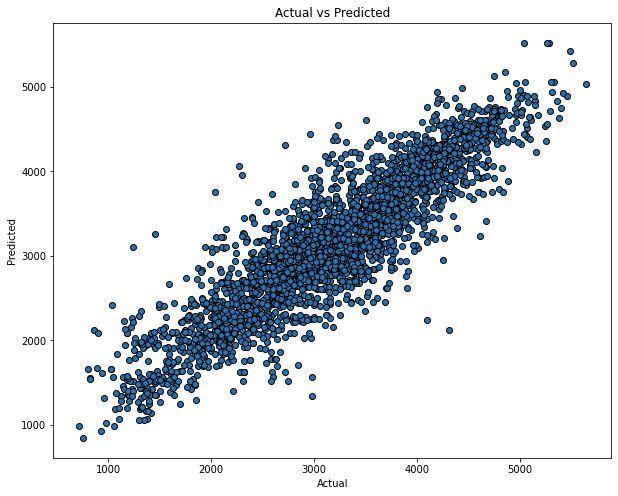

In [34]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [35]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x)).sort_values(ascending=False)[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


Province
Sarangani          35.534410
Laguna             18.444100
Batanes            17.362515
Marinduque         16.618713
Kalinga            14.468943
Romblon            13.868749
Samar              11.362509
Camiguin            9.376832
Lanao del Norte     8.038793
Apayao              7.924085
dtype: float64

In [36]:
varimp= {'imp':model.feature_importances_,'names':df_oh.columns[df_oh.columns!="yield (kg/ha)"]}

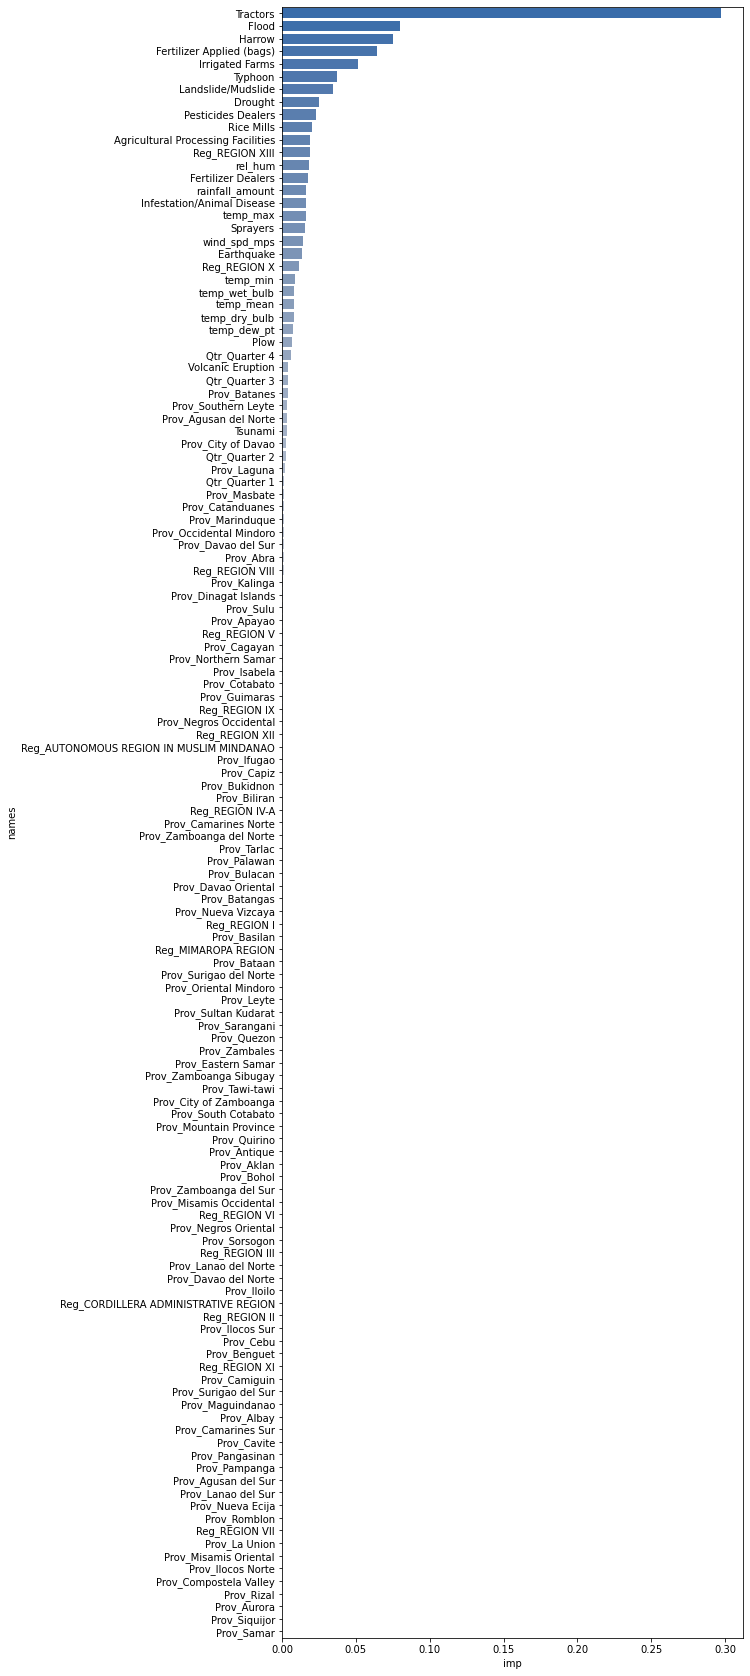

In [37]:
a4_dims = (8.27,30)

fig, ax = plt.subplots(figsize=a4_dims)
df_=pd.DataFrame.from_dict(varimp)
df_.sort_values(ascending=False,by=["imp"],inplace=True)
df_=df_.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df_,orient="h",ax=ax);

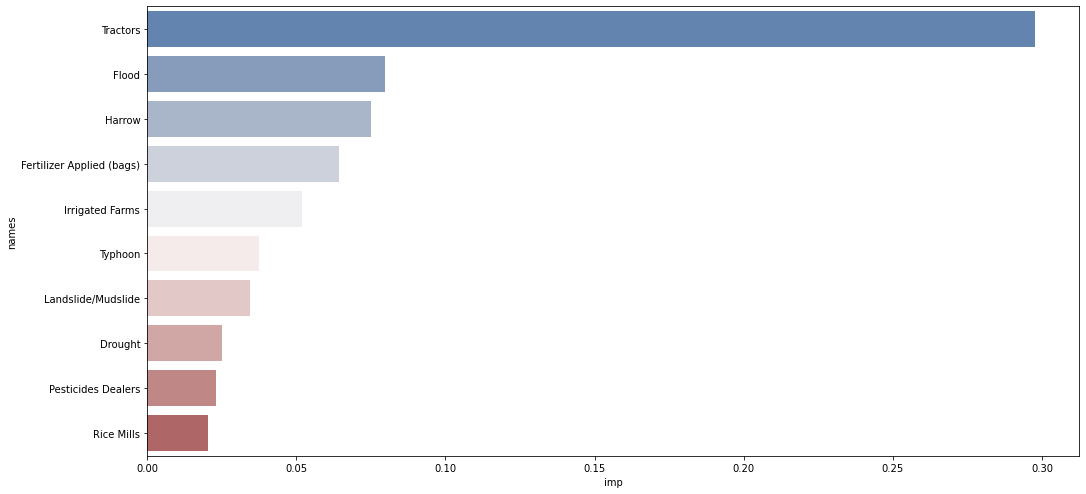

In [38]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df_=pd.DataFrame.from_dict(varimp)
df_.sort_values(ascending=False,by=["imp"],inplace=True)
df_=df_.dropna()
df_=df_.nlargest(10, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df_,orient="h",ax=ax);

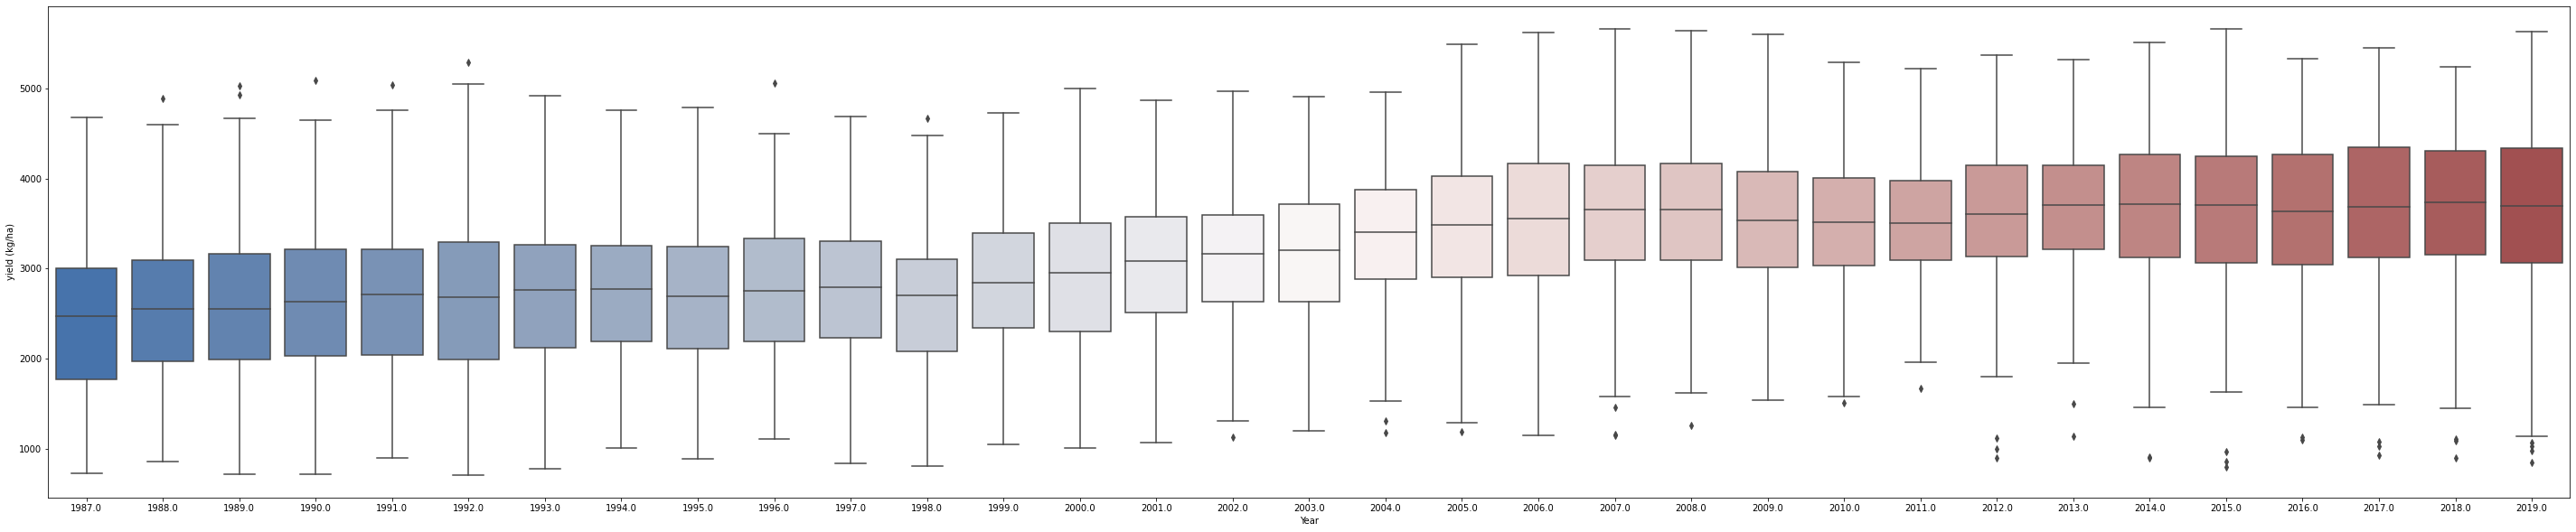

In [39]:
a4_dims = (50,10)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Year",y="yield (kg/ha)",palette="vlag",data=df1,ax=ax);